In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.cluster import KMeans


from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle

In [2]:
# Read data in the excel file
df = pd.read_excel('cardio_train.xlsx')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(70000, 12)

In [4]:
#Check null values
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
#Check null values
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
# Percentage of patients have and do not have heart disease
df['cardio'].value_counts()/df.shape[0]*100 

0    50.03
1    49.97
Name: cardio, dtype: float64

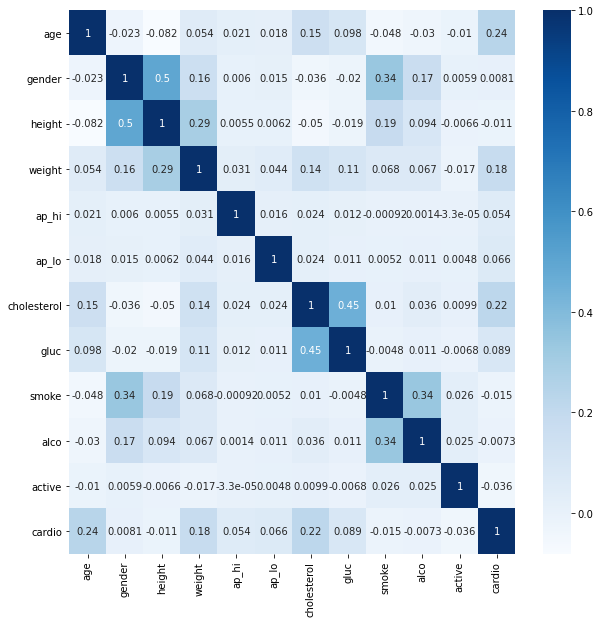

In [8]:
# Correlation map
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

In [9]:
# Initialize data and target
cardio = df['cardio']
features = df.drop(['cardio'], axis = 1)

In [10]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, cardio, test_size = 0.2, random_state = 0)

In [11]:
print(X_train.shape)
print(y_train.shape)

(56000, 11)
(56000,)


In [12]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results
    

In [ ]:
# Initialize the models
sv = SVC(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)
km = KMeans(random_state = 1)


# Fit and evaluate models
results = {}
for cls in [sv, rf, ab, gb, km]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)
    

In [48]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

SVC

classification_report :
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      7069
           1       0.77      0.62      0.69      6931

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000


confusion_matrix :
[[5778 1291]
 [2643 4288]]

-----

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      7069
           1       0.71      0.70      0.70      6931

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000


confusion_matrix :
[[5049 2020]
 [2100 4831]]

-----

AdaBoostClassifier

classification_report :
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      7069
      

In [ ]:
# get importance
importance = gb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (features.columns[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# Save the model as serialized object pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(gb, file)